In [8]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import datetime;

In [9]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [10]:
all_models = []
all_descriptions = []
all_titles = []

changed_param = "pool_size"
for pool_size in [1, 2, 3, 4, 5, 6]:
    model_layers = [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(pool_size, pool_size), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_titles.append(pool_size)
    all_descriptions.append(get_layers_info(model_layers))
all_descriptions

[0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor                                                       
 2  1        Conv2D      32      (3, 3)       relu                        
 3  2  MaxPooling2D                                   (1, 1)  (1, 1)      
 4  3       Flatten                                                       
 5  4         Dense                                                     10,
 0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor                                                       
 2  1        Conv2D      32      (3, 3)       relu                        
 3  2  MaxPooling2D                                   (2, 2)  (1, 1)      
 4  3       Flatten                                                       
 5  4         Dense                                                     10,
 0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor    

In [11]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy"])

In [12]:
batch_size = 128
epochs = 10
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    all_history.append(history)

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 1/10
469/469 [==============================] - 15s 31ms/step - loss: 0.2672 - accuracy: 0.9228 - val_loss: 0.1188 - val_accuracy: 0.9677
Epoch 2/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0977 - accuracy: 0.9727 - val_loss: 0.0759 - val_accuracy: 0.9775
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0683 - accuracy: 0.9802 - val_loss: 0.0676 - val_accuracy: 0.9793
Epoch 4/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0556 - accuracy: 0.9842 - val_loss: 0.0632 - val_accuracy: 0.9807
Epoch 5/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0465 - accuracy: 0.9869 - val_loss: 0.0619 - val_accuracy: 0.9824
Epoch 6/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0401 - accuracy: 0.9891 - val_loss: 0.0603 - val_accuracy: 0.9821
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0357 - accuracy: 0.9901 - val_loss: 0.0581 - val_accuracy:

 17%|█▋        | 1/6 [02:21<11:45, 141.15s/it]

Epoch 1/10
469/469 [==============================] - 15s 31ms/step - loss: 0.2234 - accuracy: 0.9348 - val_loss: 0.0994 - val_accuracy: 0.9678
Epoch 2/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0756 - accuracy: 0.9779 - val_loss: 0.0607 - val_accuracy: 0.9810
Epoch 3/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0569 - accuracy: 0.9834 - val_loss: 0.0532 - val_accuracy: 0.9825
Epoch 4/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0466 - accuracy: 0.9860 - val_loss: 0.0598 - val_accuracy: 0.9806
Epoch 5/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0404 - accuracy: 0.9882 - val_loss: 0.0560 - val_accuracy: 0.9818
Epoch 6/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0354 - accuracy: 0.9900 - val_loss: 0.0573 - val_accuracy: 0.9808
Epoch 7/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0317 - accuracy: 0.9909 - val_loss: 0.0492 - val_accuracy:

 33%|███▎      | 2/6 [05:01<10:10, 152.59s/it]

Epoch 1/10
469/469 [==============================] - 22s 44ms/step - loss: 0.2076 - accuracy: 0.9393 - val_loss: 0.0724 - val_accuracy: 0.9784
Epoch 2/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0672 - accuracy: 0.9803 - val_loss: 0.0548 - val_accuracy: 0.9818
Epoch 3/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0523 - accuracy: 0.9844 - val_loss: 0.0522 - val_accuracy: 0.9835
Epoch 4/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0433 - accuracy: 0.9871 - val_loss: 0.0508 - val_accuracy: 0.9836
Epoch 5/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0377 - accuracy: 0.9892 - val_loss: 0.0537 - val_accuracy: 0.9822
Epoch 6/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0324 - accuracy: 0.9906 - val_loss: 0.0518 - val_accuracy: 0.9839
Epoch 7/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0290 - accuracy: 0.9916 - val_loss: 0.0471 - val_accuracy:

 50%|█████     | 3/6 [09:24<10:09, 203.10s/it]

Epoch 1/10
469/469 [==============================] - 29s 58ms/step - loss: 0.2089 - accuracy: 0.9378 - val_loss: 0.0774 - val_accuracy: 0.9758
Epoch 2/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0652 - accuracy: 0.9804 - val_loss: 0.0501 - val_accuracy: 0.9834
Epoch 3/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0482 - val_accuracy: 0.9853
Epoch 4/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0414 - accuracy: 0.9876 - val_loss: 0.0415 - val_accuracy: 0.9872
Epoch 5/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0348 - accuracy: 0.9897 - val_loss: 0.0464 - val_accuracy: 0.9852
Epoch 6/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0306 - accuracy: 0.9909 - val_loss: 0.0421 - val_accuracy: 0.9873
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0271 - accuracy: 0.9920 - val_loss: 0.0393 - val_accuracy:

 67%|██████▋   | 4/6 [12:35<06:36, 198.03s/it]

Epoch 1/10
469/469 [==============================] - 17s 36ms/step - loss: 0.2290 - accuracy: 0.9322 - val_loss: 0.0703 - val_accuracy: 0.9786
Epoch 2/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0658 - accuracy: 0.9792 - val_loss: 0.0492 - val_accuracy: 0.9848
Epoch 3/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0495 - accuracy: 0.9850 - val_loss: 0.0369 - val_accuracy: 0.9885
Epoch 4/10
469/469 [==============================] - 17s 35ms/step - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.0388 - val_accuracy: 0.9889
Epoch 5/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0351 - accuracy: 0.9897 - val_loss: 0.0394 - val_accuracy: 0.9889
Epoch 6/10
469/469 [==============================] - 16s 35ms/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0371 - val_accuracy: 0.9890
Epoch 7/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.0395 - val_accuracy:

 83%|████████▎ | 5/6 [15:46<03:15, 195.65s/it]

Epoch 1/10
469/469 [==============================] - 55s 113ms/step - loss: 0.2460 - accuracy: 0.9277 - val_loss: 0.0627 - val_accuracy: 0.9811
Epoch 2/10
469/469 [==============================] - 56s 120ms/step - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.0433 - val_accuracy: 0.9856
Epoch 3/10
469/469 [==============================] - 54s 116ms/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0578 - val_accuracy: 0.9830
Epoch 4/10
469/469 [==============================] - 54s 116ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0401 - val_accuracy: 0.9863
Epoch 5/10
469/469 [==============================] - 45s 97ms/step - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.0392 - val_accuracy: 0.9872
Epoch 6/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0358 - val_accuracy: 0.9880
Epoch 7/10
469/469 [==============================] - 45s 95ms/step - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0423 - val_accur

100%|██████████| 6/6 [24:10<00:00, 241.75s/it]


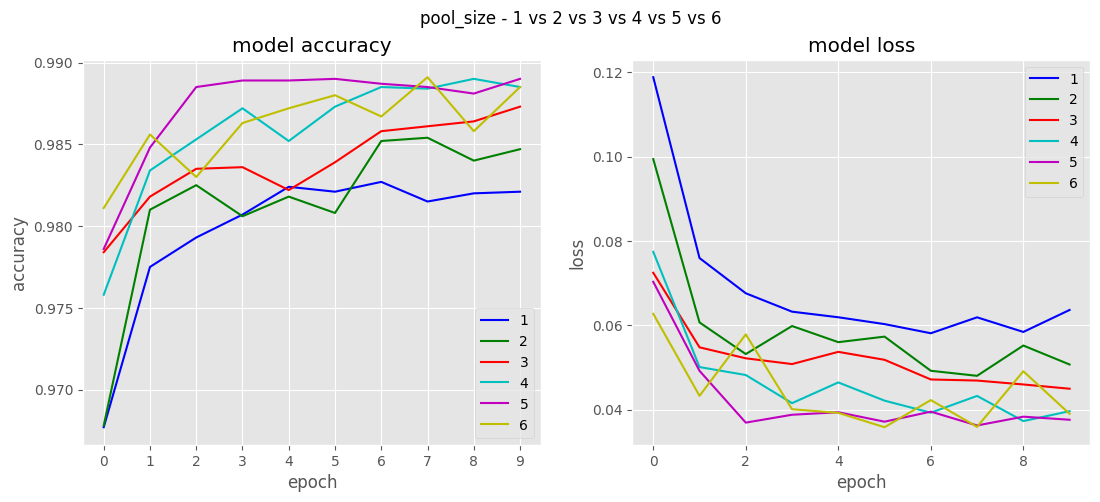

In [14]:
all_title =  f"{changed_param} - " + " vs ".join([str(x) for x in all_titles])
set_plt(all_history, all_titles, all_title)
all_title += f"_{datetime.datetime.now()}"
plt.savefig(f'plots/{all_title}.png')
plt.show()
for i, df in enumerate(all_descriptions):
    df.to_csv(Path(f"csvs/{all_title}_{i}.csv"), index=False)